In [6]:
import cv2
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load the Cifar dataset
Cifar data contains 60,000 classified images and is present in tf datasets of which 50,000 are used for training and the rest for testing

In [2]:
cifar_10=tf.keras.datasets.cifar10

(train_images,train_labels),(test_images,test_labels)=cifar_10.load_data()

train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Data contain 50,000 examples in training and 32 x 32 grids each for RGB values.

In [3]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
# train_labels contains all the classes
train_labels[:20]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6]], dtype=uint8)

Values present here are between 0 and 9 and each corresponds of each of the following

In [5]:
look_up=['Airplane',
         'Automobile',
         'Bird',
         'Cat',
         'Deer',
         'Dog',
         'Frog',
         'Horse',
         'Ship',
         'Truck']

In [7]:
train_labels.shape

(50000, 1)

## Randomly Visualising n number of  images

In [8]:
def show_img(images,labels,n_imgs):
    random_int=np.random.randint(0,labels.shape[0]-n_imgs)
    imgs,labels=images[random_int:random_int+n_imgs], \
                labels[random_int:random_int+n_imgs]
    
    _,figs=plt.subplots(1,n_imgs,figsize=(n_imgs*3,3))
    
    for fig,img,label in zip(figs,imgs,labels):
        fig.imshow(img)
        ax=fig.axes
        
        ax.set_title(look_up[int(label)])
        
        ax.title.set_fontsize(20)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

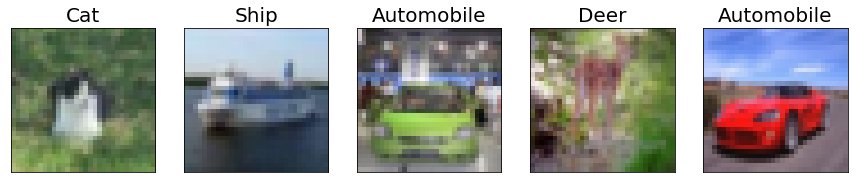

In [11]:
# selecting 5 images in random from the training data
show_img(train_images,train_labels,5)

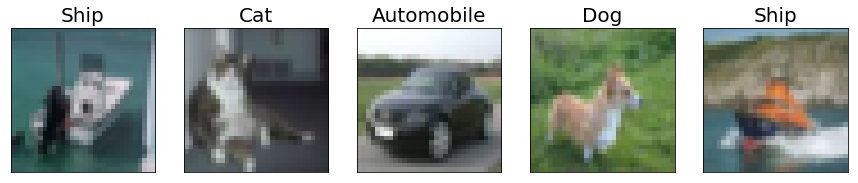

In [12]:
show_img(train_images,train_labels,5)

## Saving Images to the Disk

In [13]:
train_dir="./datasets/train_cifar/"
test_dir="./datasets/test_cifar/"

i=0

for img,label in zip(train_images,train_labels):
    path=train_dir+str(look_up[int(label)])
    
    # Writing the file using OpenCV
    cv2.imwrite(os.path.join(path,str(i)+'.jpeg'),img)
    
    i+=1
    cv2.waitKey(0)

In [17]:
i=0

for img,label in zip(test_images,test_labels):
    path=test_dir+str(look_up[int(label)])
    
    cv2.imwrite(os.path.join(path,str(i)+'.jpeg'),img)
    
    i+=1
    cv2.waitKey(0)

## Reading Images via ImageDataGenerator
Reads images from a source(file,dataframe,URL), decodes images into the proper grid format, converts them to floating point tensors, performs other processing on images

In [18]:
train_imgs_generator=ImageDataGenerator(rescale=1./255)
test_imgs_generator=ImageDataGenerator(rescale=1./255)

In [19]:
batch_size=64

In [20]:
# Read the data from a directory in batches
train_data_gen=train_imgs_generator.flow_from_directory(batch_size=batch_size,
                                                       directory=train_dir,
                                                       shuffle=True,
                                                       target_size=(32,32))

Found 50000 images belonging to 10 classes.


In [21]:
# Read the test data
test_data_gen=test_imgs_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=test_dir,
                                                     shuffle=True,
                                                     target_size=(32,32))

Found 10000 images belonging to 10 classes.


In [30]:
# Viewing size of an individual sample, train_data_gen returns 2 values,
sample_batch=next(train_data_gen)
sample_batch[0].shape

(64, 32, 32, 3)

## Designing a CNN

In [31]:
# Our Model is a Sequential model with stacked Convolutional and Pooling layer.
# 1st layer is a 2D Convolutional layer with 16 deep Feature Maps,Convolutional Kernel of size (3,3)
# 2nd layer is again a CL whose o/p is a Feature Map i.e. 32 deep
# 3rd Layer is a Pooling operation performed via a 2x2 kernel
# Again an additional 3 layers are used for the Convolution and pooling purpose,
# later these are then fed to a Dense 2 layered NN which is then used for making a prediction.

conv_model=tf.keras.Sequential([
    layers.Conv2D(16,(3,3),padding='same',activation='relu',
                 input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [32]:
# Compiling the model
# CategoricalCrossentropy to be used when the labels >=2 and when the labels are
# one-hot encoded. If the labels are numerical values then go for 
# "SparseCategoricalCrossentropy"
conv_model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

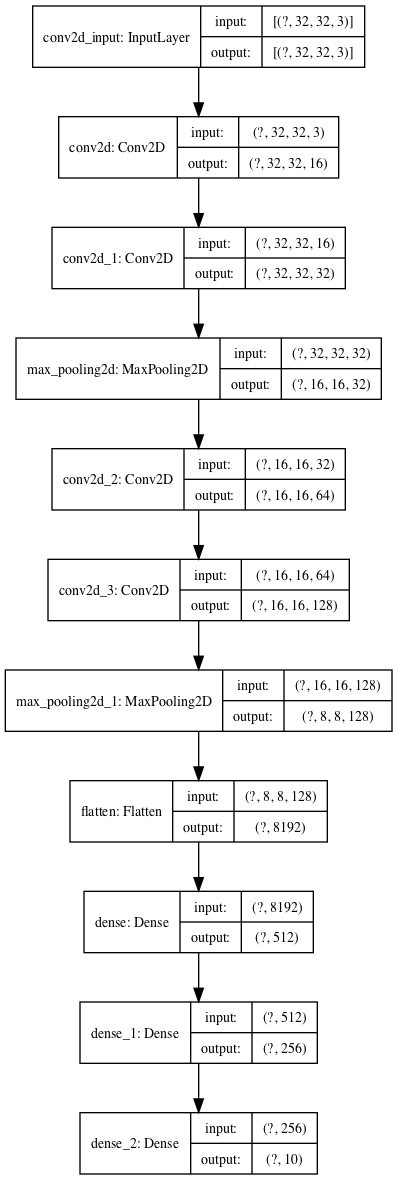

In [33]:
# Plotting the model architecture
keras.utils.plot_model(conv_model,'model_image_classification_shapes.png',show_shapes=True)

In [34]:
training_hist=conv_model.fit(train_data_gen,
                            epochs=10,
                            steps_per_epoch=len(train_images)//batch_size,
                            validation_data=test_data_gen,
                            validation_steps=len(test_images)//batch_size)

Epoch 1/10
781/781 [==============================] - 331s 424ms/step - loss: 1.3777 - accuracy: 0.5002 - val_loss: 1.0743 - val_accuracy: 0.6144
Epoch 2/10
781/781 [==============================] - 297s 381ms/step - loss: 0.8603 - accuracy: 0.6988 - val_loss: 0.8806 - val_accuracy: 0.6907
Epoch 3/10
781/781 [==============================] - 262s 335ms/step - loss: 0.6342 - accuracy: 0.7791 - val_loss: 0.7473 - val_accuracy: 0.7433
Epoch 4/10
781/781 [==============================] - 202s 258ms/step - loss: 0.4536 - accuracy: 0.8415 - val_loss: 0.7348 - val_accuracy: 0.7538
Epoch 5/10
781/781 [==============================] - 194s 249ms/step - loss: 0.2934 - accuracy: 0.8959 - val_loss: 0.8774 - val_accuracy: 0.7510
Epoch 6/10
781/781 [==============================] - 192s 246ms/step - loss: 0.1744 - accuracy: 0.9399 - val_loss: 0.9915 - val_accuracy: 0.7471
Epoch 7/10
781/781 [==============================] - 222s 285ms/step - loss: 0.1312 - accuracy: 0.9542 - val_loss: 1.1311 -

## Exploring the result

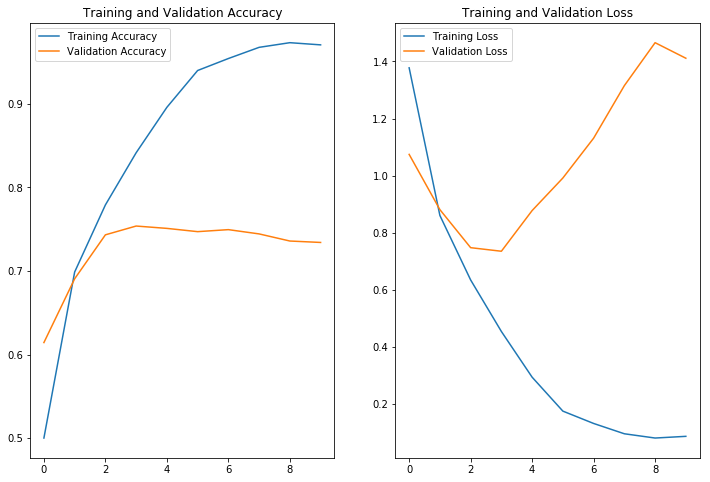

In [36]:
acc=training_hist.history['accuracy']
val_acc=training_hist.history['val_accuracy']

loss=training_hist.history['loss']
val_loss=training_hist.history['val_loss']

epochs_range=range(10)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')

plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')

plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

We can clearly see that the model is overfitting by performing well on the training set and not performing that well on validation set. Therefore , we need to perform Regularization to improve model performance, or if possible get more data to train the model.

In [38]:
test_images[0].shape

(32, 32, 3)

In [50]:
# Helper function to analyse the result
def perform_test(model,img,label):
    plt.imshow(img)
    
    test_img=np.expand_dims(img,axis=0)
    result=model.predict(test_img)
    
    print('Actual Label: ',look_up[int(label)])
    print('Predicted Label : ',look_up[np.argmax(result)])

Actual Label:  Cat
Predicted Label :  Truck


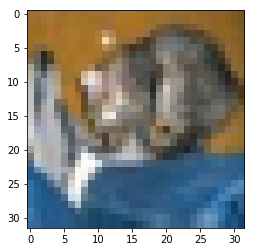

In [51]:
perform_test(conv_model,test_images[0],test_labels[0])

Actual Label:  Ship
Predicted Label :  Ship


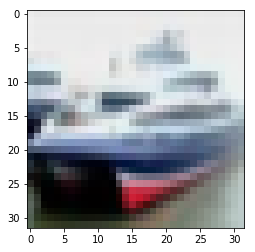

In [52]:
perform_test(conv_model,test_images[1],test_labels[1])

Actual Label:  Automobile
Predicted Label :  Automobile


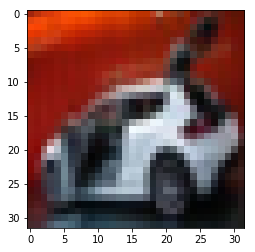

In [56]:
perform_test(conv_model,test_images[6],test_labels[6])

## Improving Model performance
### 1. Generating more Data
This is when `ImageDataGenerator` comes handy when we want to generate more new images by using the previous sets of images by either rotating the image, flipping the image, Zooming the image etc. Though it doesn't provide much of a new information to the model as compared to the totally new images but can help to improve the model performance.

In [57]:
image_gen=ImageDataGenerator(
            rescale=1./255,
            rotation_range=30,
            width_shift_range=.05,
            height_shift_range=.05,
            horizontal_flip=True,
            zoom_range=0.3)

Found 50000 images belonging to 10 classes.


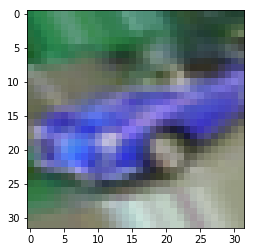

In [58]:
train_data_gen_aug=image_gen.flow_from_directory(batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(32,32))

plt.imshow(train_data_gen_aug[0][0][0])

### 2. Dropout Regularisation
We'll slightly change the architecture of our model by adding a dropout layer which will help in avoiding overfitting by spreading the values of weights equally among all the features.

In [59]:
conv_model_dropout=tf.keras.Sequential([
    layers.Conv2D(16,(3,3),padding='same',activation='relu',
                 input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),  
    
    layers.Dropout(0.10),
    
    layers.Flatten(),
    
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.10),
    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')   
])

In [60]:
conv_model_dropout.compile(optimizer='adam',
                          loss=keras.losses.CategoricalCrossentropy(),
                          metrics=['accuracy'])

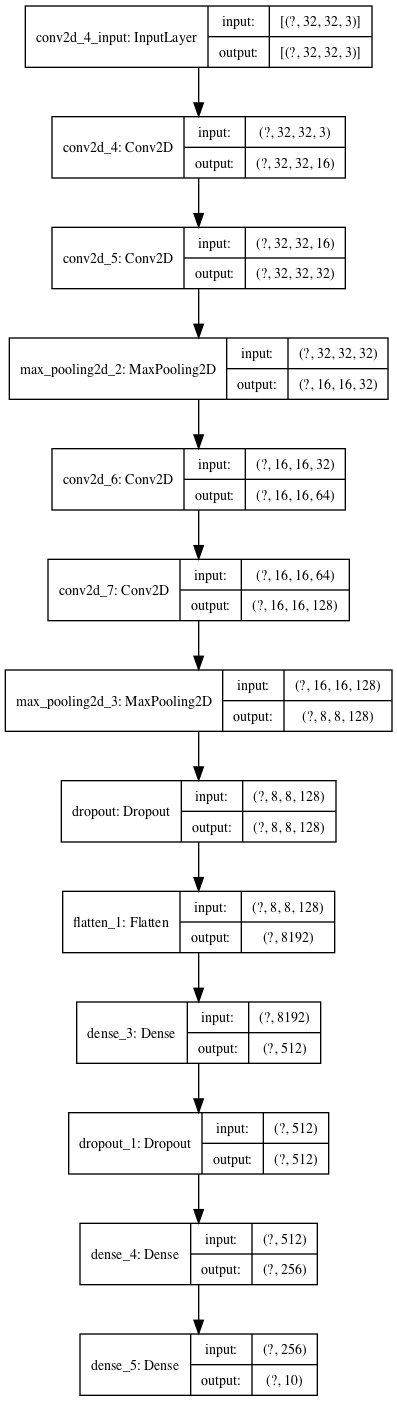

In [61]:
keras.utils.plot_model(conv_model_dropout,'Convolutional_withDropout.png',show_shapes=True)

In [62]:
# Training the model
training_hist=conv_model_dropout.fit(train_data_gen_aug,
                                    epochs=10,
                                    steps_per_epoch=len(train_images)//batch_size,
                                    validation_data=test_data_gen,
                                    validation_steps=len(test_images)//batch_size)

Epoch 1/10
781/781 [==============================] - 255s 326ms/step - loss: 1.6158 - accuracy: 0.4113 - val_loss: 1.2579 - val_accuracy: 0.5399
Epoch 2/10
781/781 [==============================] - 258s 330ms/step - loss: 1.2598 - accuracy: 0.5480 - val_loss: 1.1657 - val_accuracy: 0.6047
Epoch 3/10
781/781 [==============================] - 263s 337ms/step - loss: 1.1228 - accuracy: 0.6025 - val_loss: 0.9622 - val_accuracy: 0.6658
Epoch 4/10
781/781 [==============================] - 215s 275ms/step - loss: 1.0363 - accuracy: 0.6367 - val_loss: 0.8599 - val_accuracy: 0.6984
Epoch 5/10
781/781 [==============================] - 217s 278ms/step - loss: 0.9674 - accuracy: 0.6593 - val_loss: 0.9917 - val_accuracy: 0.6665
Epoch 6/10
781/781 [==============================] - 236s 302ms/step - loss: 0.9104 - accuracy: 0.6790 - val_loss: 0.8664 - val_accuracy: 0.7069
Epoch 7/10
781/781 [==============================] - 264s 338ms/step - loss: 0.8744 - accuracy: 0.6936 - val_loss: 0.7683 -

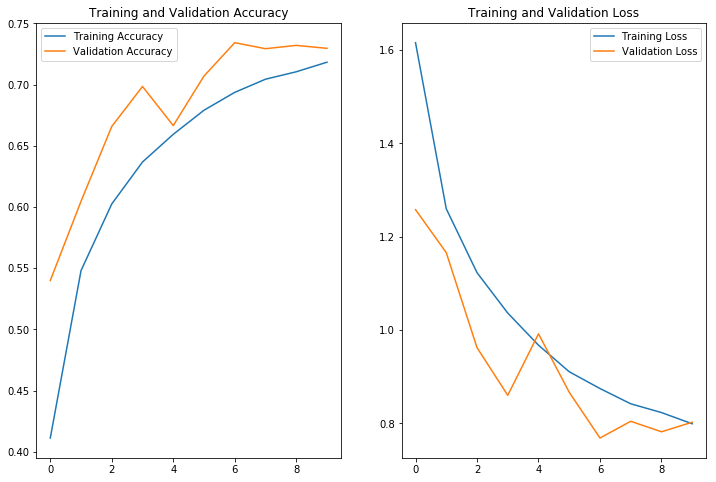

In [63]:
acc=training_hist.history['accuracy']
val_acc=training_hist.history['val_accuracy']

loss=training_hist.history['loss']
val_loss=training_hist.history['val_loss']

epochs_range=range(10)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')

plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')

plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

Hence, we can see that the model's performance on Validation set has also improved drastically and we have successfully overcome the issue of Overfitting.

Actual Label:  Cat
Predicted Label :  Truck


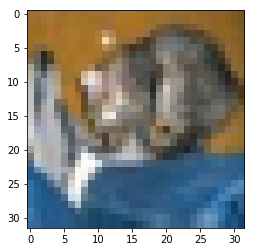

In [64]:
perform_test(conv_model,test_images[0],test_labels[0])

Actual Label:  Automobile
Predicted Label :  Automobile


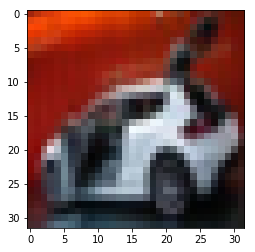

In [72]:
perform_test(conv_model,test_images[6],test_labels[6])

Actual Label:  Dog
Predicted Label :  Dog


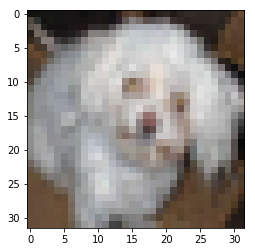

In [74]:
perform_test(conv_model,test_images[1000],test_labels[1000])